## Name: Paul Russavage

## Rank: 2nd on the kaggle leaderboard at 3pm Oct. 31st.

### Description: I tried out some of the other algorithms such as logistic regression, SVC, and Naive Bayes. Later, I optimized the Decision Tree parameters using a Grid Search and then used that as the base for AdaBoost. 

## Code:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.utils import shuffle


#boosting libs
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
from xgboost import XGBClassifier

In [8]:
data = pd.read_csv('byudatasciencecapstone/magic04.csv')
#data = shuffle(data)
data.head()

,fLen0t1,fWidt1,fSize,fConc,fConc1,fAsym,fM3Lon0,fM3Trans,fAlp1a,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,0
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,0
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,0
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,0
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,0


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = data.iloc[:,:len(data.columns)-1]
Y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0, test_size = 0.3)
X_train = X_train.to_numpy()

In [10]:
#logit
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

print("Training Accuracy:", lr.score(X_train, y_train)) # Accuracy of the model when training.
print("Testing Accuracy:", lr.score(X_test, y_test) ) # Accuracy of the test.

Training Accuracy: 0.7885684242151119
Testing Accuracy: 0.7909218366631616


/home/paulrsvg/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
#SVC 
from sklearn.svm import SVC  
svclassifier = SVC()  
svclassifier.fit(X_train, y_train)  
print("Training Accuracy:",svclassifier.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", svclassifier.score(X_test, y_test) )#Accuracy of the test.

/home/paulrsvg/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Training Accuracy: 0.9993240198287517
Testing Accuracy: 0.6552751489660007


In [12]:
#DT - decision tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt # for the plot
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = 5, min_samples_leaf = 5) 
# Performing training 
clf_entropy.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

Training Accuracy: 0.8252215712783536
Testing Accuracy: 0.8203645285664213


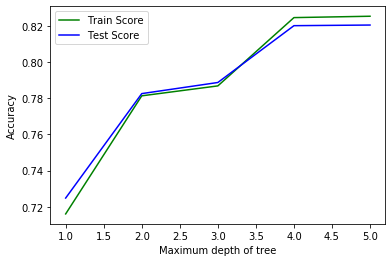

In [13]:
print("Training Accuracy:",clf_entropy.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf_entropy.score(X_test, y_test) )#Accuracy of the test.

train_score_array = []
test_score_array = []

for k in range (1, 6):
    clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = k, min_samples_leaf = 5) 
    clf.fit(X_train, y_train)
    train_score_array.append(clf.score(X_train, y_train))
    test_score_array.append(clf.score(X_test, y_test))
x_axis = range(1,6) # x_axis values
%matplotlib inline
#x-values, y-values, Name for legend, color
plt.plot(x_axis, train_score_array , label = "Train Score", c= "g") #Plots a green line
plt.plot(x_axis, test_score_array, label = "Test Score", c= "b")  #Plots a blue line
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.legend()

In [16]:
#grid search to optimize params
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
              'min_samples_leaf':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'criterion': ['entropy', 'gini']}


In [17]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 6, return_train_score = True)
grid_search.fit(X_train, y_train)



GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,

In [18]:
print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best score: 0.8451
Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 1}


In [19]:
#DT now w/ optimized params
bestdt = DecisionTreeClassifier(criterion = "entropy", random_state = 10, max_depth = 11, min_samples_leaf = 1) 
bestdt.fit(X_train, y_train)
print("Training Accuracy:",bestdt.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", bestdt.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.9207601021481148
Testing Accuracy: 0.8447248510339993


In [21]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Training Accuracy:", gnb.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", gnb.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 0.7281057533423464
Testing Accuracy: 0.7245005257623555


In [23]:
#boosting - ada
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(base_estimator = bestdt, n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the test.

Training Accuracy: 1.0
Testing Accuracy: 0.8778478794251665


In [22]:
#boosting - gradient
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=500)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print("Training Accuracy:",clf.score(X_train, y_train)) #Accuracy of the model when training.
print("Testing Accuracy:", clf.score(X_test, y_test) )#Accuracy of the tes

Training Accuracy: 0.9220369535826949
Testing Accuracy: 0.8799509288468279


In [24]:
#when you're ready to export csv
y_pred = clf.predict_proba(X)
mySubmission = pd.DataFrame({'Id': range(len(data)), 'Predicted': y_pred[:,1]})
mySubmission.head()

# Use the following line to save your submisstion. You can use any filename. 
mySubmission.to_csv('Magic04Submission.csv', index=False)